In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet


In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# Podgląd plików w katalogu (jeśli potrzebne)
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Rossmann'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Załadowanie danych z nowymi ścieżkami
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann/train.csv",
                    parse_dates=True, low_memory=False, index_col='Date')

store = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann/store.csv",
                    low_memory=False)

test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann/test.csv",
                   parse_dates=True, low_memory=False, index_col='Date')

# Wstępny podgląd danych
print("Train shape:", train.shape)
print("Store shape:", store.shape)
print("Test shape:", test.shape)

train.head()


/content/drive/MyDrive/Colab Notebooks/Rossmann/store.csv
/content/drive/MyDrive/Colab Notebooks/Rossmann/sample_submission.csv
/content/drive/MyDrive/Colab Notebooks/Rossmann/test.csv
/content/drive/MyDrive/Colab Notebooks/Rossmann/train.csv
Train shape: (1017209, 8)
Store shape: (1115, 10)
Test shape: (41088, 7)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
from prophet import Prophet


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




In [ ]:
# Importing train data to learn
train = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Rossmann/train.csv",
    parse_dates=True, low_memory=False, index_col='Date'
)

# Additional store data
store = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Rossmann/store.csv",
    low_memory=False
)

# Time series as indexes
train.index


DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [ ]:
print(train.shape)
train.head()

(1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


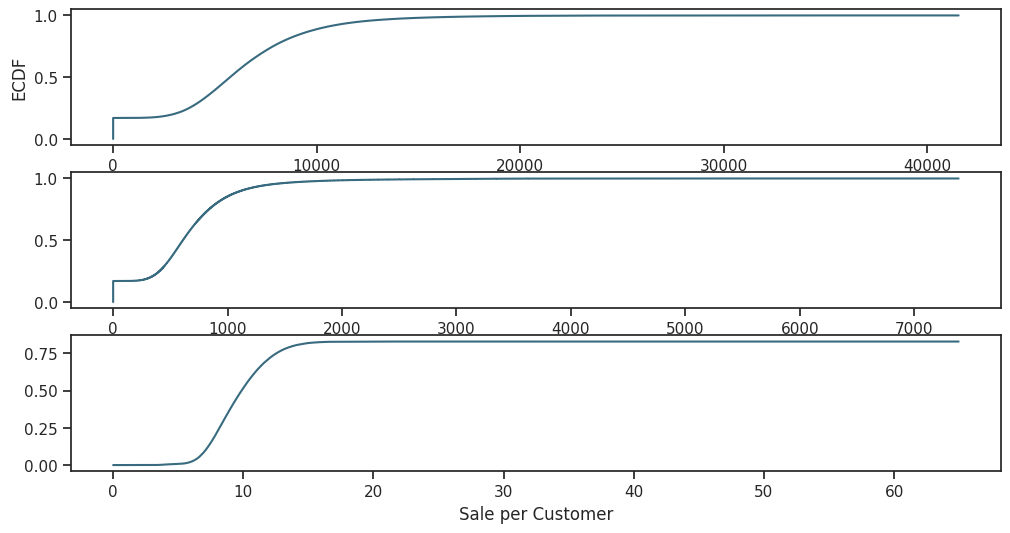

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)
Joining train set with an additional store information.
In total:  (844338, 22)
              count          mean          std     min      25%     50%  \
StoreType                                                                 
a          457042.0   6925.697986  3277.351589    46.0  4695.25  6285.0   
b           15560.0  10233.380141  5155.729868  1252.0  6345.75  9130.0   
c          112968.0   6933.126425  2896.958579   133.0  4916.00  6408.0   
d          258768.0   6822.300064  2556.401455   538.0  5050.00  6395.0   

                75%      max  
StoreType                     
a           8406.00  41551.0  
b          13184.25  38722.0  
c           8349.25  31448.0  
d           8123.25  38037.0  


Text(0.5, 0.98, 'Monthly Sales by Promo and StoreType')

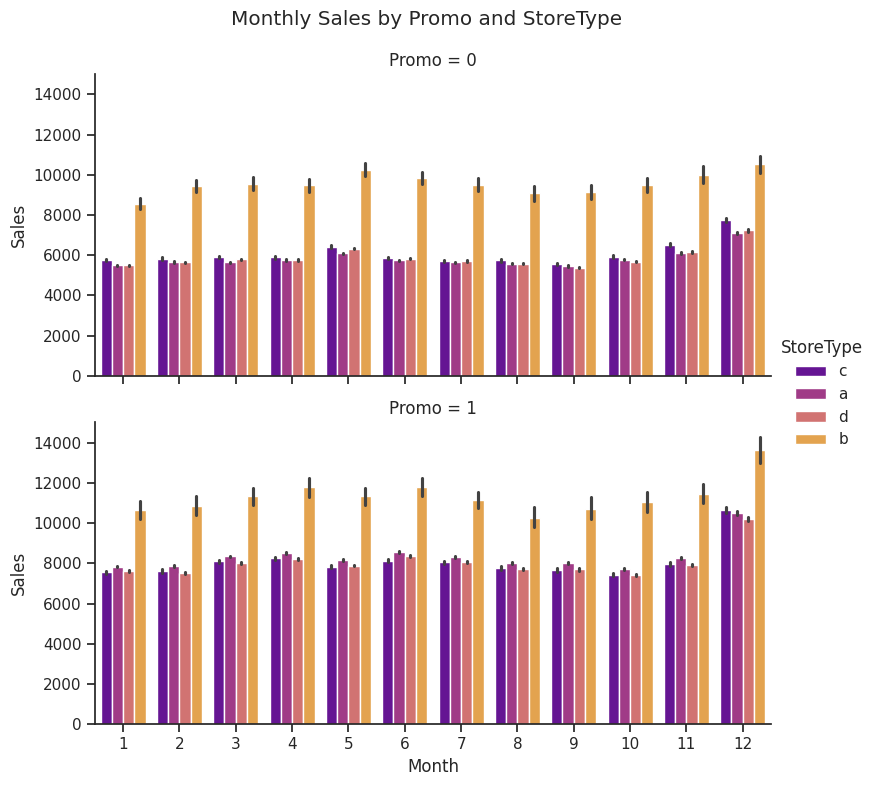

In [ ]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
train_path = '/content/drive/MyDrive/Colab Notebooks/Rossmann/train.csv'
store_path = '/content/drive/MyDrive/Colab Notebooks/Rossmann/store.csv'

# Read train data
train = pd.read_csv(train_path, parse_dates=['Date'], low_memory=False, index_col='Date')

# Read store data
store = pd.read_csv(store_path, low_memory=False)

# Prepare train data
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week

train['SalePerCustomer'] = train['Sales'] / train['Customers']

# ECDF Plots
sns.set(style="ticks")
c = '#386B7F'  # Basic color for plots
plt.figure(figsize=(12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label="statmodels", color=c)
plt.xlabel('Sales')
plt.ylabel('ECDF')

plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label="statmodels", color=c)
plt.xlabel('Customers')

plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label="statmodels", color=c)
plt.xlabel('Sale per Customer')

plt.show()

# Remove closed stores and zero sales
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
print("In total: ", train.shape)

# Handle missing values in store data
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
store.fillna(0, inplace=True)

# Merge train and store data
print("Joining train set with an additional store information.")
train_store = pd.merge(train, store, how='inner', on='Store')
print("In total: ", train_store.shape)

# Sales trends by StoreType
print(train_store.groupby('StoreType')['Sales'].describe())

# Visualization of trends
sns.catplot(
    data=train_store,
    x='Month',
    y='Sales',
    palette='plasma',
    row='Promo',
    hue='StoreType',
    kind='bar',
    height=4,
    aspect=2
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Monthly Sales by Promo and StoreType")


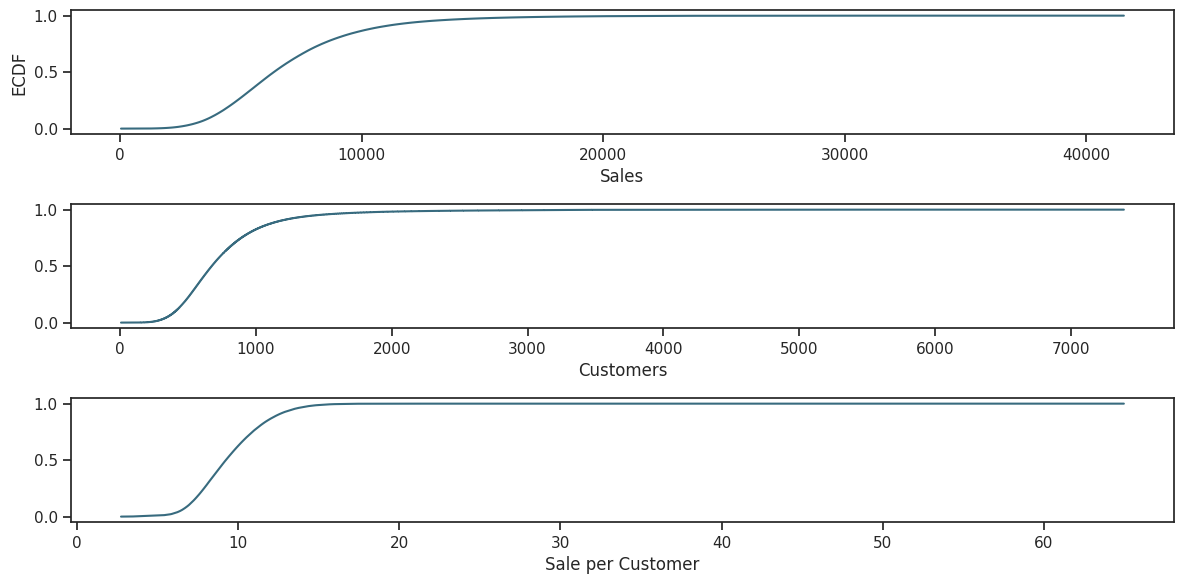

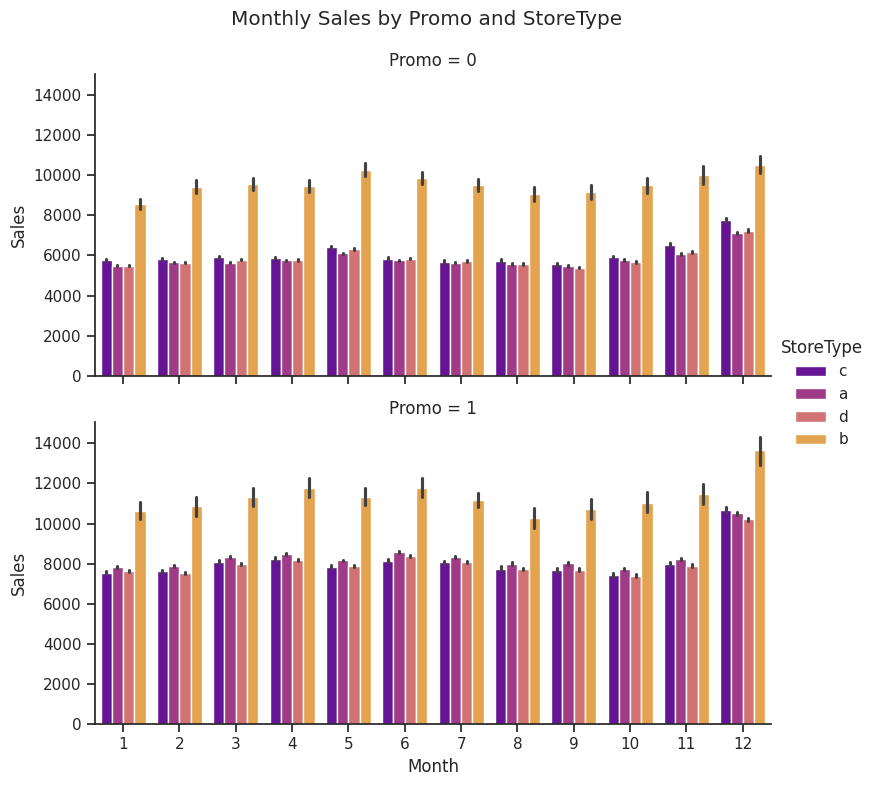

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp772spaf3/r8fdam_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp772spaf3/tzmb8tmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44187', 'data', 'file=/tmp/tmp772spaf3/r8fdam_c.json', 'init=/tmp/tmp772spaf3/tzmb8tmd.json', 'output', 'file=/tmp/tmp772spaf3/prophet_modelt3e389zw/prophet_model-20241224074323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


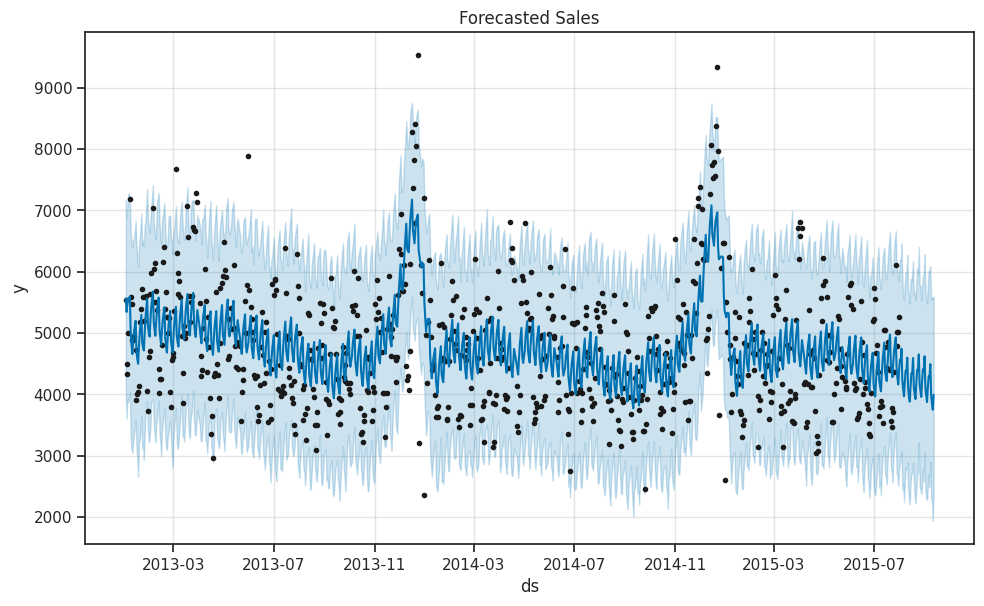

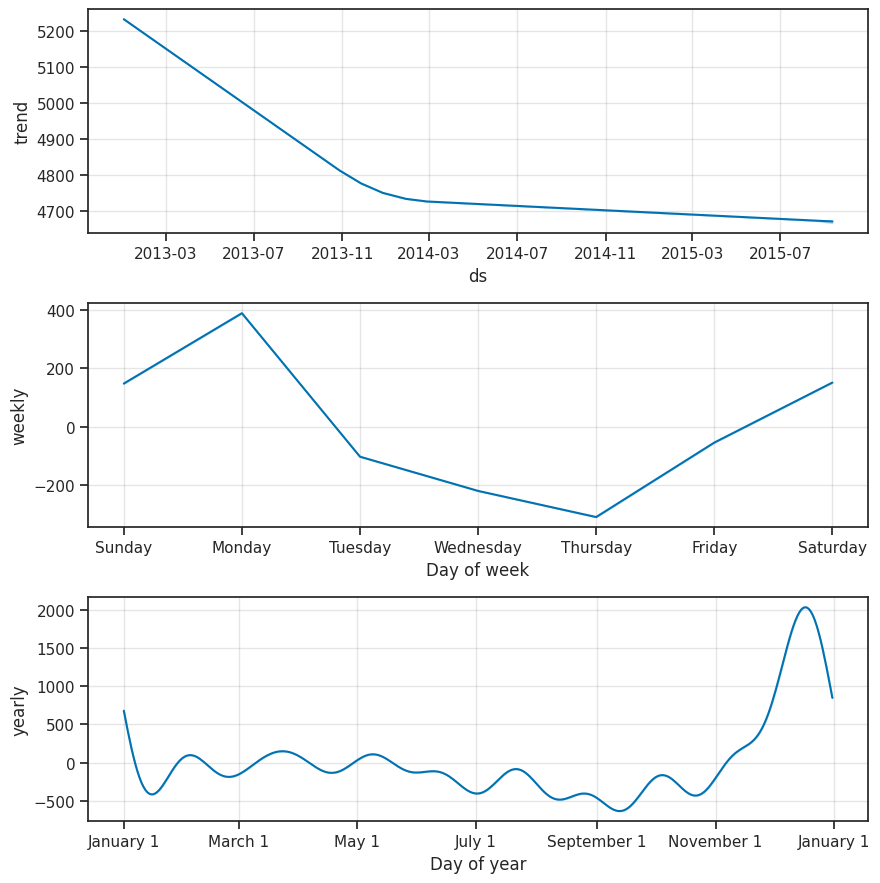

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

# File paths
train_path = '/content/drive/MyDrive/Colab Notebooks/Rossmann/train.csv'
store_path = '/content/drive/MyDrive/Colab Notebooks/Rossmann/store.csv'

# Load data
train = pd.read_csv(train_path, parse_dates=['Date'], low_memory=False, index_col='Date')
store = pd.read_csv(store_path, low_memory=False)

# Data Cleaning
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
store.fillna(0, inplace=True)

# Feature Engineering (before merge)
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week
train['SalePerCustomer'] = train['Sales'] / train['Customers']

# Restore 'Date' as a column
train.reset_index(inplace=True)

# Merge train and store data
train_store = pd.merge(train, store, how='inner', on='Store')

# ECDF Visualization
sns.set(style="ticks")
plt.figure(figsize=(12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label="ECDF", color='#386B7F')
plt.xlabel('Sales')
plt.ylabel('ECDF')

plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label="ECDF", color='#386B7F')
plt.xlabel('Customers')

plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label="ECDF", color='#386B7F')
plt.xlabel('Sale per Customer')

plt.tight_layout()
plt.show()

# Sales trends by StoreType and Promo
sns.catplot(
    data=train_store,
    x='Month',
    y='Sales',
    row='Promo',
    hue='StoreType',
    kind='bar',
    palette='plasma',
    height=4,
    aspect=2
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Monthly Sales by Promo and StoreType")
plt.show()

# Prepare data for Prophet (sales for Store 1)
sales = train_store[train_store.Store == 1].loc[:, ['Date', 'Sales']]
sales['Date'] = pd.to_datetime(sales['Date'])
sales.reset_index(drop=True, inplace=True)
sales = sales.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Prophet Model
my_model = Prophet(interval_width=0.95)
my_model.fit(sales)

# Forecast
future_dates = my_model.make_future_dataframe(periods=6 * 7)
forecast = my_model.predict(future_dates)

# Visualizing Forecast
my_model.plot(forecast)
plt.title("Forecasted Sales")
plt.show()

# Visualizing Components
my_model.plot_components(forecast)
plt.show()
